In [27]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

df = pd.read_csv("sample_data/CitarumWater.csv")
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [28]:
# Menampilkan informasi awal dataset
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB
None

Statistik De

In [29]:
# Menampilkan 5 baris pertama untuk melihat data
print("\nContoh Data:")
print(df.head())


Contoh Data:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


In [38]:
# --- 1. PREPROCESSING DATA ---
# Identifikasi kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Jika ada kolom kategorikal, kita perlu mengonversinya ke angka
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Periksa kembali setelah transformasi
print("\nKolom setelah Label Encoding:")
print(df.head())



Kolom setelah Label Encoding:
   No  NamaSungai  TitikPantau  Waktu    pH  Temp   TSS    DO   BOD    COD  \
0   1           0            7    568  7.57     0  11.0  6.11  3.30   6.10   
1   2           0            2    568  7.69     0  13.0  6.20  5.31  12.50   
2   3           0            5    568  7.39     0  15.0  3.61  7.40  23.50   
3   4           0            3    568  7.49     0  17.0  3.17  8.13  27.50   
4   5           0            4    568  7.17     0   6.0  6.82  2.89   5.44   

   Nitrat  FecalColiform  Fosfat  O2    IP  Class  
0    1.08        17000.0   0.043   0  5.12      3  
1    1.85        28000.0   0.011   0  5.91      3  
2    1.25        90000.0   0.230   0  7.76      3  
3    1.21       300000.0   0.057   0  9.61      3  
4    1.04         3000.0   0.110   0  2.44      2  


In [41]:
# --- 2. PISAHKAN FITUR & TARGET ---
# Asumsikan kolom target adalah "Kualitas_Air" (pastikan sesuai dengan dataset)
target_column = "Class"

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=[target_column])  # Fitur
y = df[target_column]  # Target

In [42]:
# --- 3. NORMALISASI FITUR ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# --- 4. SPLIT DATA TRAINING & TEST ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- 5. TRAINING MODEL LOGISTIC REGRESSION ---
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # Solver cocok untuk multiclass
model.fit(X_train, y_train)

# --- 6. PREDIKSI ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Probabilitas untuk setiap kelas


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [44]:
# --- 7. EVALUASI MODEL ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Diganti dari 'binary' ke 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')  # Diganti dari 'binary' ke 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')  # Diganti dari 'binary' ke 'weighted'
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # AUC untuk multiclass

print("\nEvaluasi Model Logistic Regression:")
print(f"Akurasi      : {accuracy:.4f}")
print(f"Presisi      : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"AUC-ROC      : {auc:.4f}")



Evaluasi Model Logistic Regression:
Akurasi      : 0.9680
Presisi      : 0.9682
Recall       : 0.9680
F1-Score     : 0.9680
AUC-ROC      : 0.9981


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


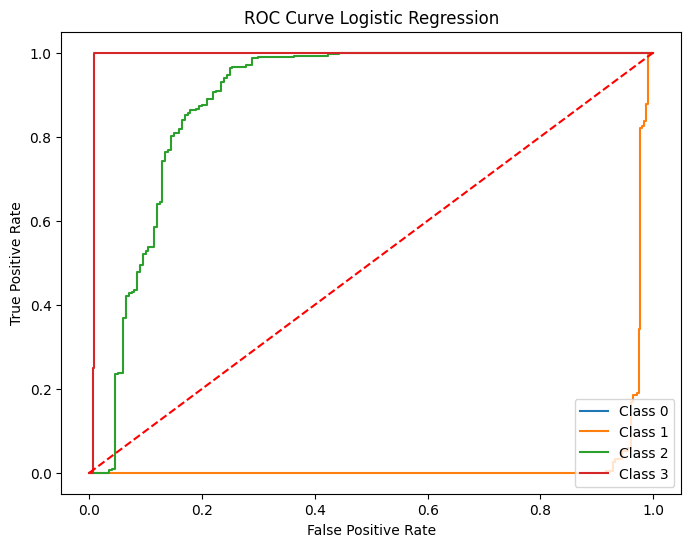

In [45]:
# --- 8. PLOTTING ROC CURVE ---
plt.figure(figsize=(8, 6))
for i in range(y_pred_proba.shape[1]):  # Loop untuk setiap kelas
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])  # ROC untuk kelas i
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'r--')  # Garis diagonal untuk baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.legend(loc="lower right")
plt.show()


#**PENJELASAN**


1.   Akurasi
*   Akurasi mengukur seberapa sering model membuat prediksi yang bener terhadap keseluruhan data.
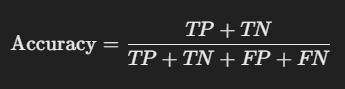
*   Penjelasan:
  - TP (True Positive): Model memprediksi "1" (ada penyakit) dan benar.
  - TN (True Negative): Model memprediksi "0" (tidak ada penyakit) dan benar.
  - FP (False Positive): Model memprediksi "1" tetapi seharusnya "0".
  - FN (False Negative): Model memprediksi "0" tetapi seharusnya "1".

2.   Presisi
- Presisi mengukur seberapa banyak dari semua prediksi positif yang benar.

  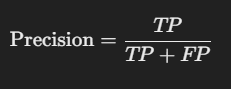

- Penjelasan:
  - Semakin tinggi presisi, semikin sedikit (kesalahan False Positive).
  - Berguna jika kita ingin meminimalkan kesalahan positif (misalnya, tes kanker, di mana kesalahan False Positive bisa menyebabkan stress bagi pasien).

3. Recall (True Positive Rate)
*   Recall mengukur seberapa banyak kasus positive yang benar-benar berhasil ditemukan oleh model.

  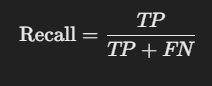
*   Penjelasan:
 - semakin tinggi recall, semakin sedikit kesalahan False Negative.
 - Berguna jika kita ingin menangkap sebanyak mungkin kasus positive, misalnya pada deteksi penyakit berbahaya seperti kanker.

4. F1-Score (Harmonic Mean of Precision & Recall)
- F1-Score adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya.

  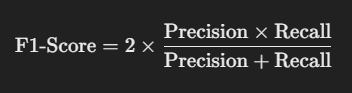

- Penjelasan:
  - F1-Score sangat berguna ketika dataset tidak seimbang.
  - Jika kita hanya mengandalkan akurasi pada dataset yang tidak seimbang, hasilnya bisa menyesatkan.

5. ROC-AUC (Receiver Operating Characteristic - Area Under Curve).
- ROC-AUC mengukur kemampuan model dalam membedakan kelas positif dan negatif berdasarkan probabilitas prediksi.
  - ROC Curve: Grafik yang menunjukkan Trade-off antara True Positive Rate (Recall) dan False Positive Rate (FPR).
  - AUC (Area Under Curve): Luas di bawah kurva ROC yang menunjukkan seberapa baik model mengklasifikasikan positif dan negatif.
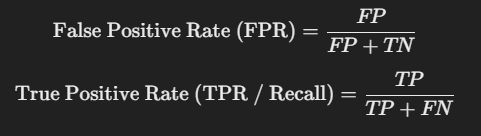

  - Nilai AUC = 1.0 → Model sempurna.
  - Nilai AUC = 0.5 → Model sama seperti tebakan acak.
  - Nilai AUC < 0.5 → Model lebih buruk dari tebakan acak.